In [1]:
import pandas as pd
import numpy as np
from apifunctions import *

import matplotlib.pyplot as plt
from scipy import stats
import streamlit as st

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
wacc=pd.read_csv("../data/wacc.csv",index_col = 'ID')
prices=pd.read_csv("../data/prices.csv")
sales_growth=pd.read_csv("../data/sales_growth.csv", index_col = 'ID')
parameters_new_t=pd.read_csv("../data/parameters_new_t.csv")
companies_to_use=pd.read_csv("../data/companies_to_use.csv")

In [3]:
companies_to_use=companies_to_use['0'].values.tolist()

#### First we select the year and the list of companies for which we want to calculate the dcf_value and distributions

In [4]:
year="2021"
companies_to_use=companies_to_use

#### We first get the last year revenue of the companies we are interested in:


In [5]:
sales_last_year=last_year_rev(companies_to_use,parameters_new_t,year)

#### We rename the columns in the sales_growth dataset for simplicity

In [6]:
sales_growth.columns = ['2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021']

#### We put into a list the growth rate we are going to use for the selected companies

In [7]:
growth_rate=growth_rate(companies_to_use,sales_growth,year)

#### We get the parameters we are going to use for the free cash flow calculations


In [8]:
ebitda_margin,depr_percent,nwc_percent,capex_percent,tax_rate=parameters(companies_to_use,parameters_new_t,year)

#### We calculate the free cash flows for the list of companies we have

In [9]:
free_cash_flows=[]
for i in range(len(ebitda_margin)):
    
    free_cash_flows.append(free_cash_flow(growth_rate[i],ebitda_margin[i],depr_percent[i],nwc_percent[i],capex_percent[i],tax_rate[i],sales_last_year[i]))

#### We calculate the dcf_value for each of the companies:

In [10]:
wacc.columns = ['2010', '2011', '2012', '2013','2014', '2015', '2016', '2017','2018', '2019', '2020', '2021']

#### We calculate the terminal value for each of the companies

In [11]:
dcf_values=[]
for i in range(len(ebitda_margin)):
    
    dcf_values.append(terminal_value(wacc["2021"][i],free_cash_flows[i],growth_rate[i]))

#### We iterate 10,000 times the values of sales_growth, ebitda_margin and nwc_percent  using a monte_carlo simulation to get the distribution of the price for each company

In [12]:
output_distribution=[]

for j in range(len(companies_to_use)):

    
    growth_rate_f=growth_rate[j]
    ebitda_margin_f=ebitda_margin[j]
    depr_percent_f=depr_percent[j]
    nwc_percent_f=nwc_percent[j]
    capex_percent_f=capex_percent[j]
    tax_rate_f=tax_rate[j]
    sales_last_year_f=sales_last_year[j]
    wacc_f=wacc[year][companies_to_use[j]]
    free_cash_flows_f=free_cash_flows[j]

    output_distribution.append(run_mcs(growth_rate_f,ebitda_margin_f,depr_percent_f,nwc_percent_f,capex_percent_f,tax_rate_f,sales_last_year_f,wacc_f,free_cash_flows_f))
    

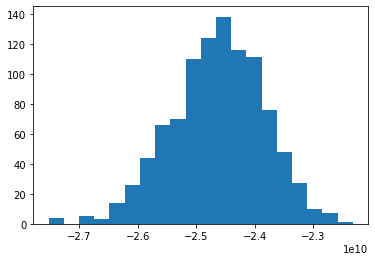

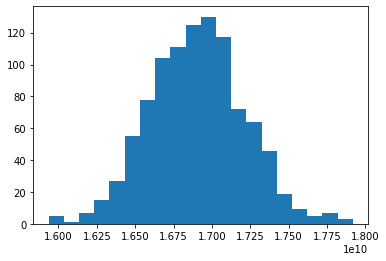

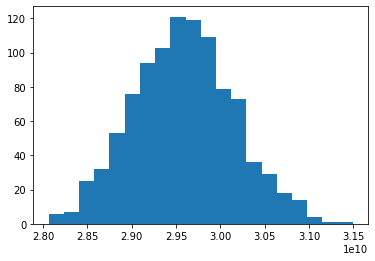

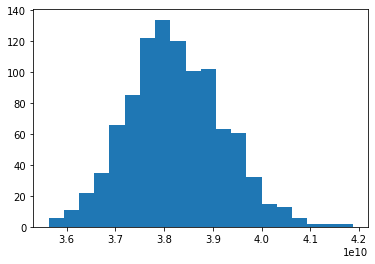

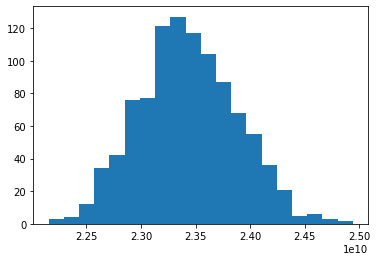

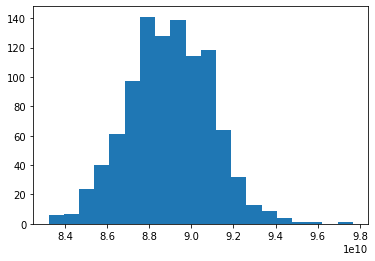

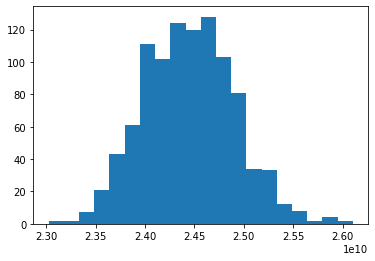

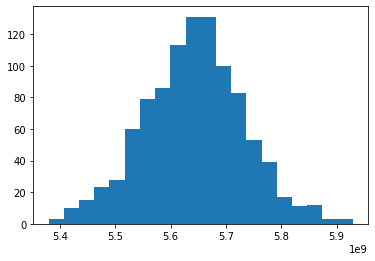

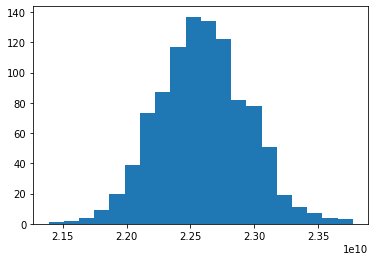

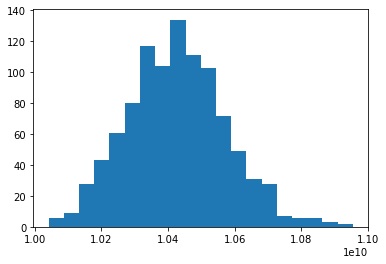

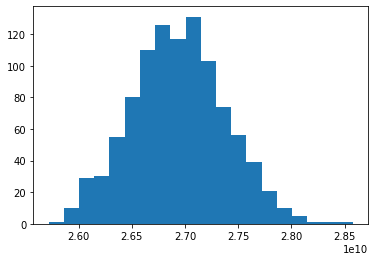

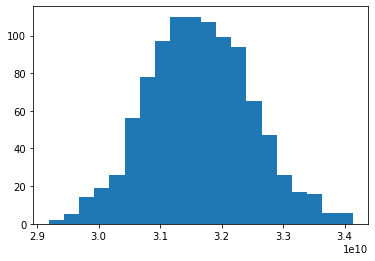

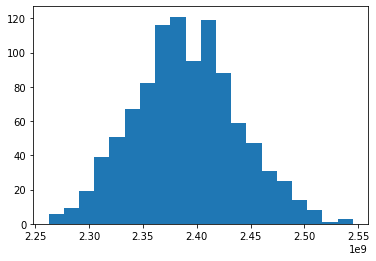

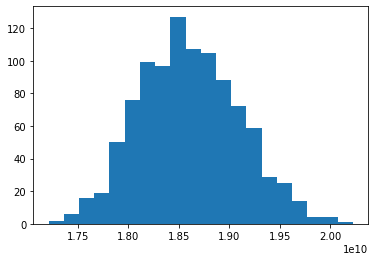

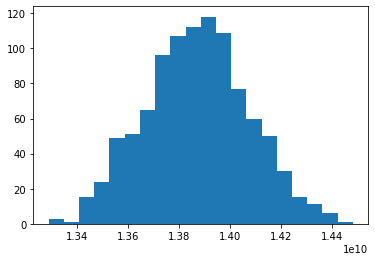

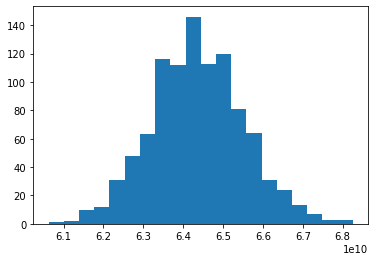

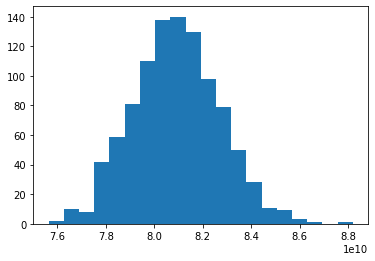

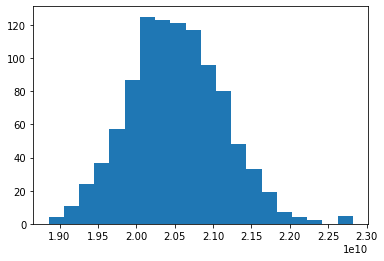

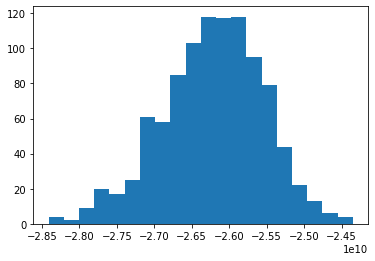

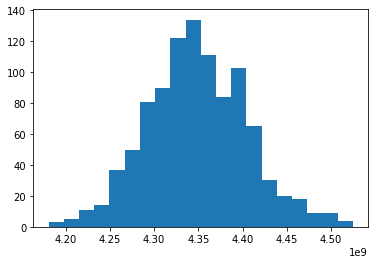

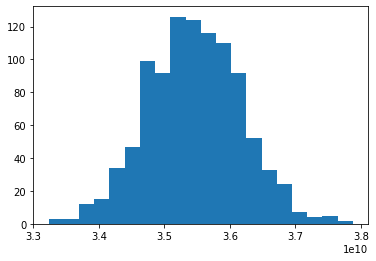

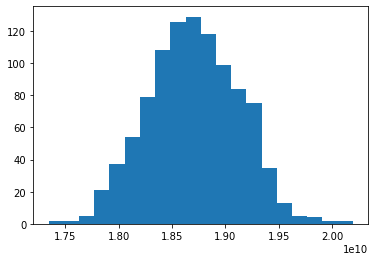

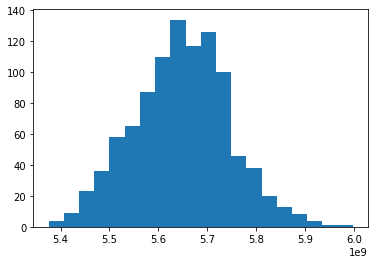

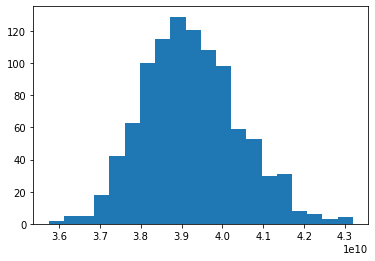

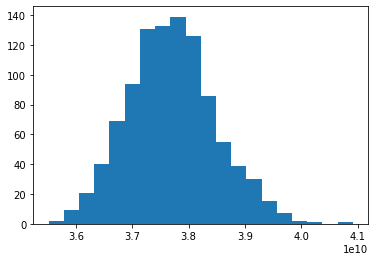

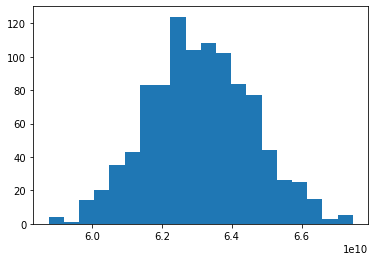

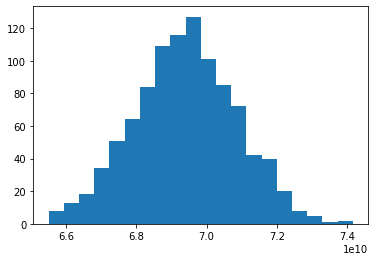

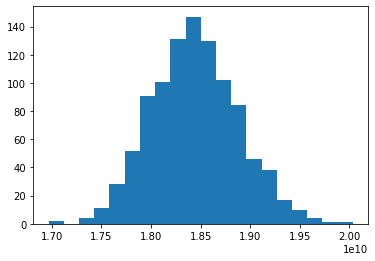

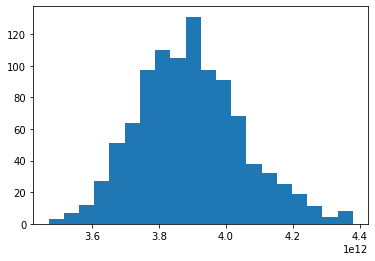

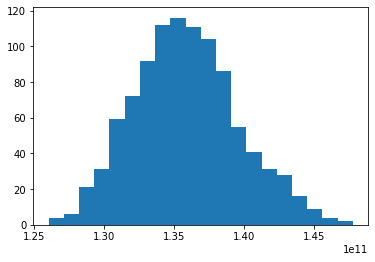

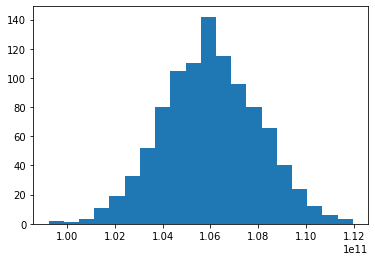

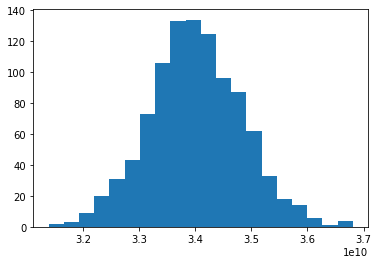

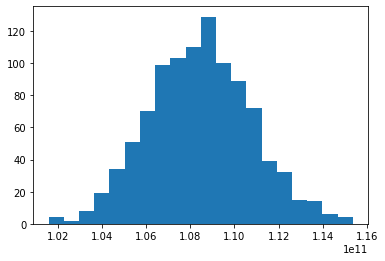

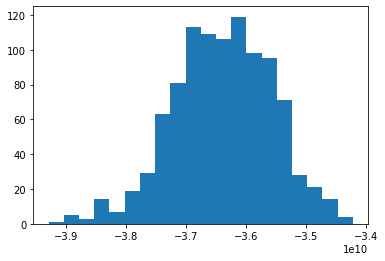

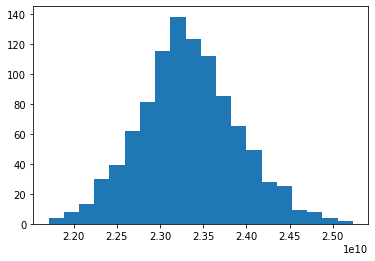

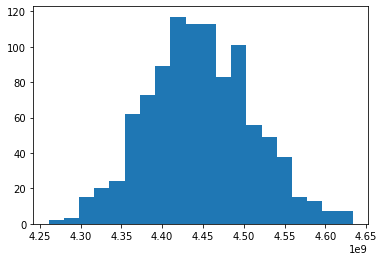

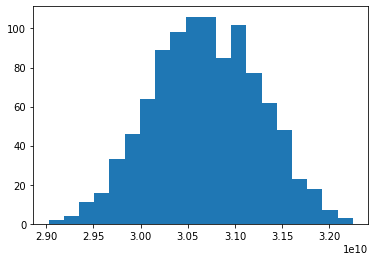

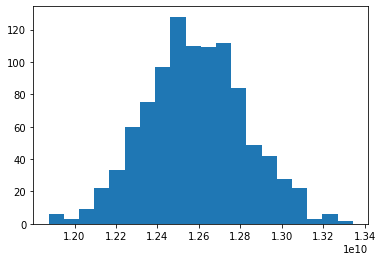

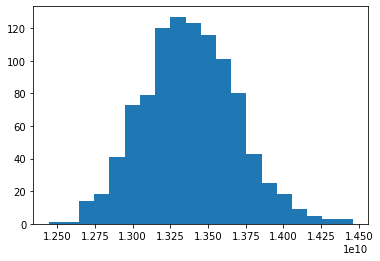

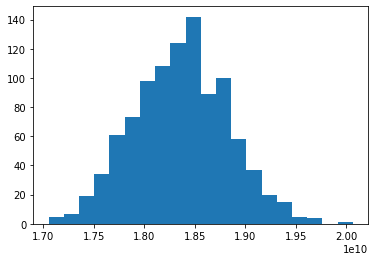

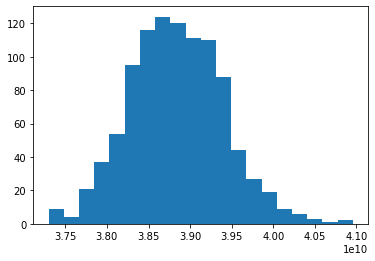

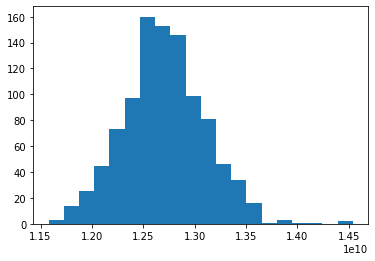

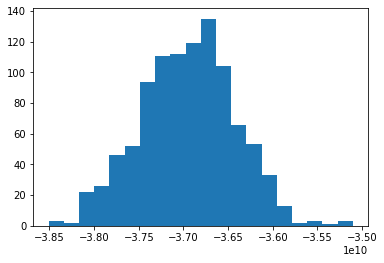

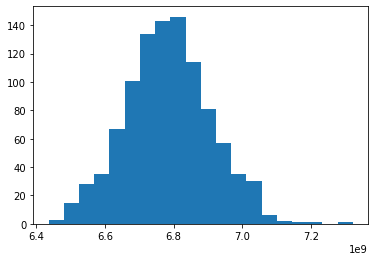

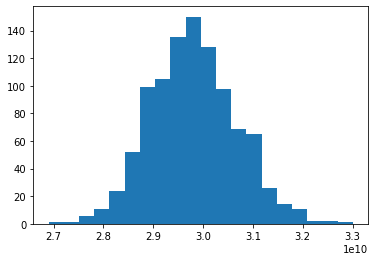

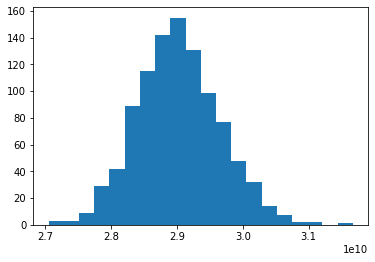

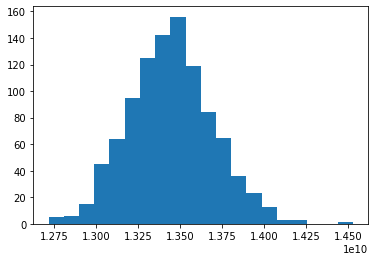

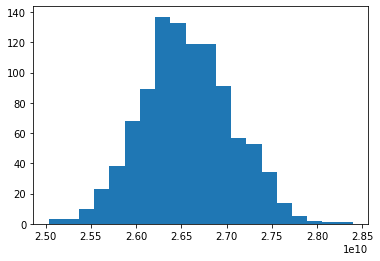

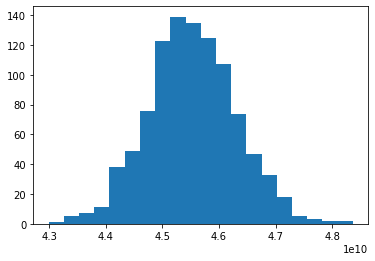

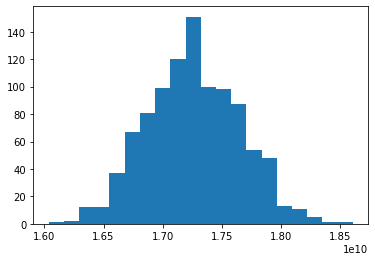

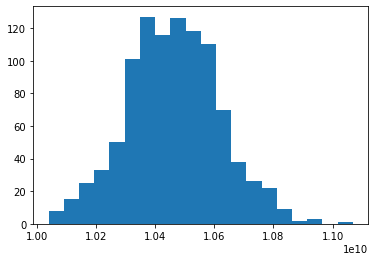

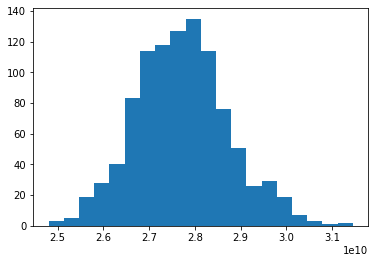

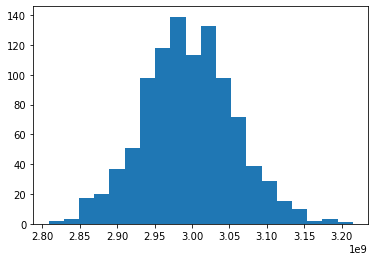

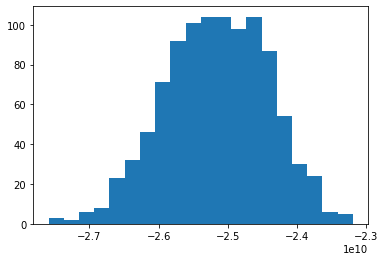

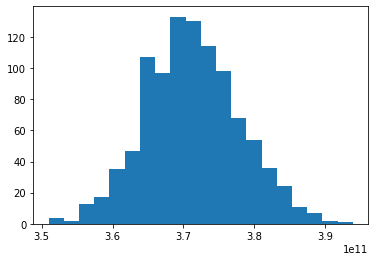

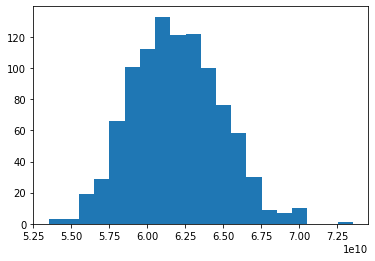

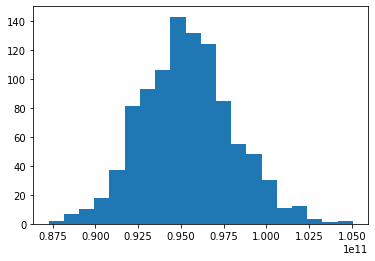

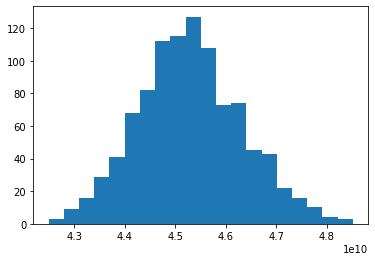

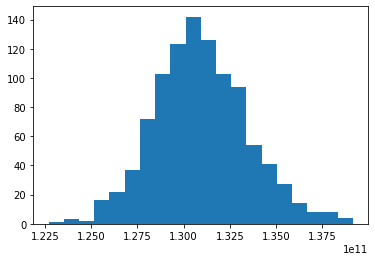

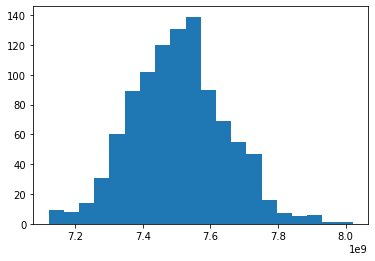

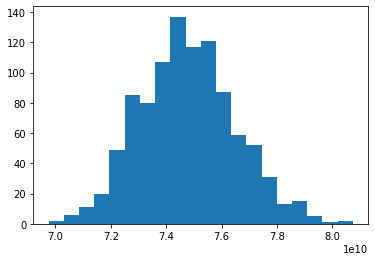

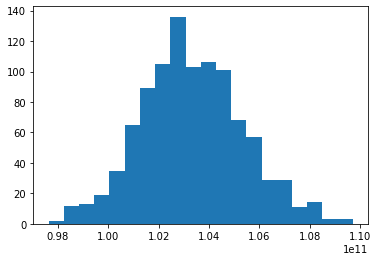

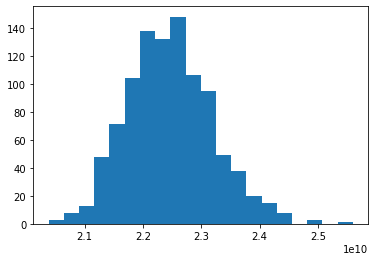

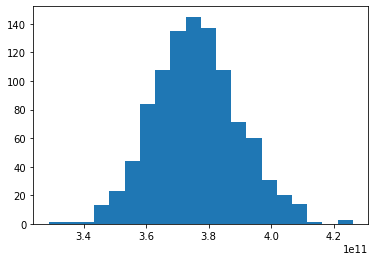

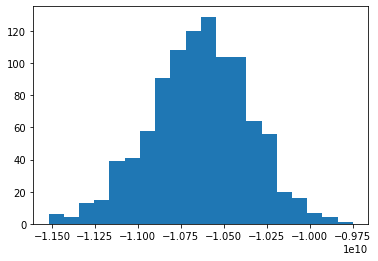

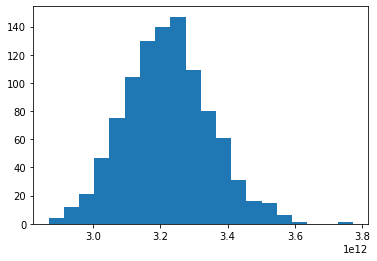

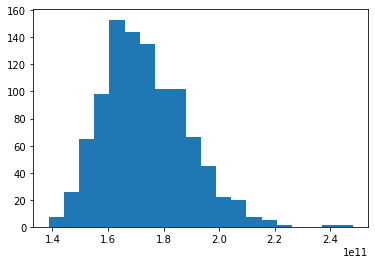

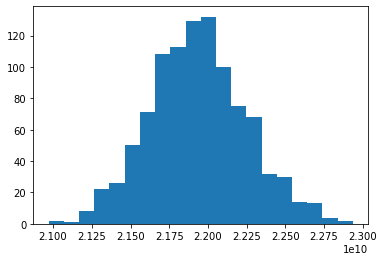

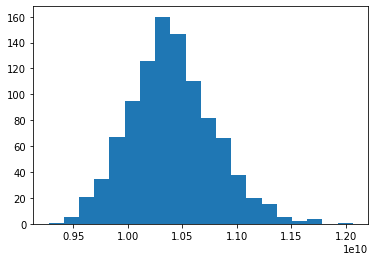

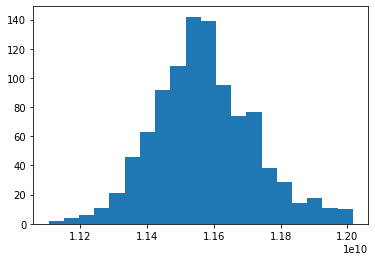

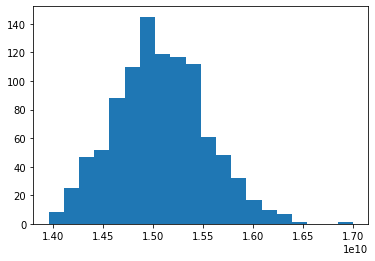

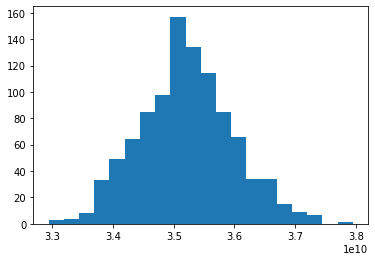

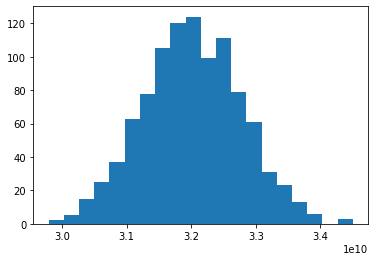

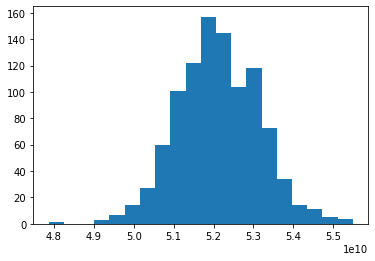

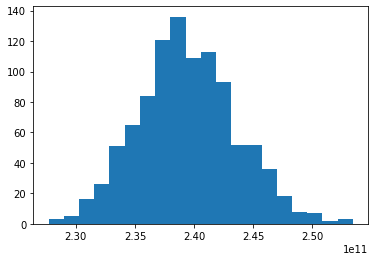

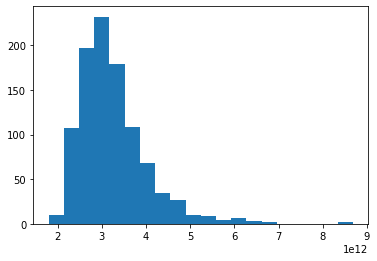

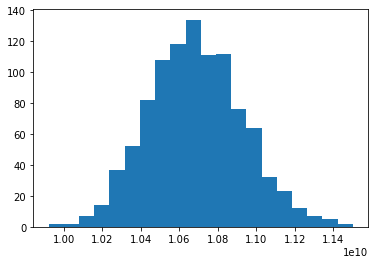

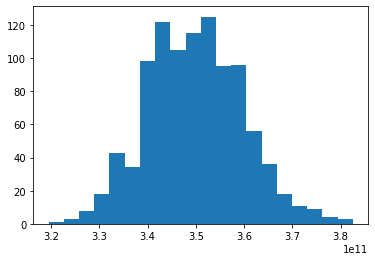

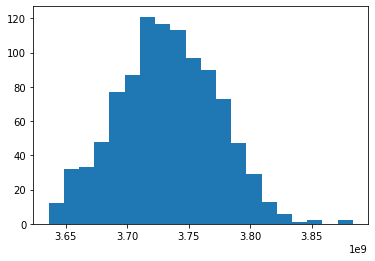

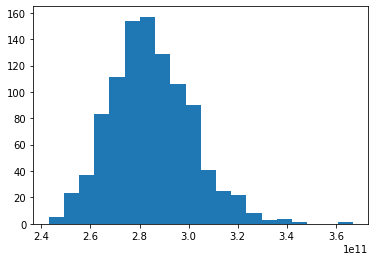

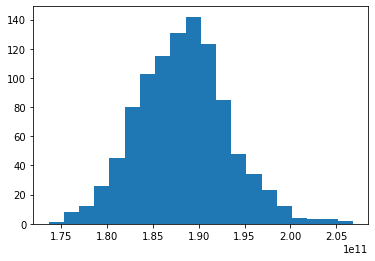

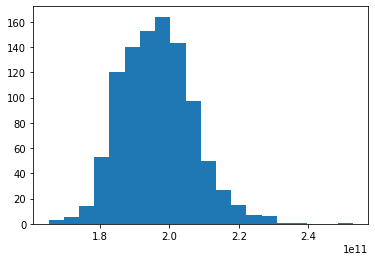

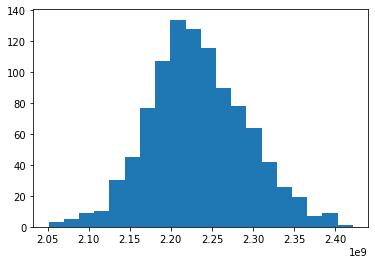

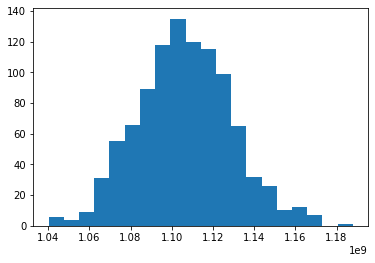

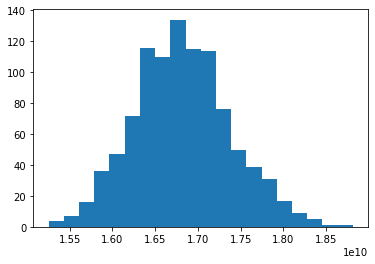

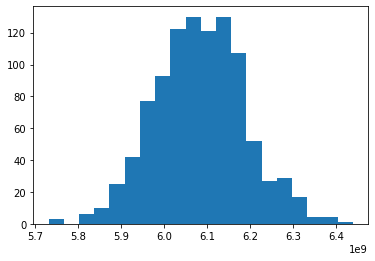

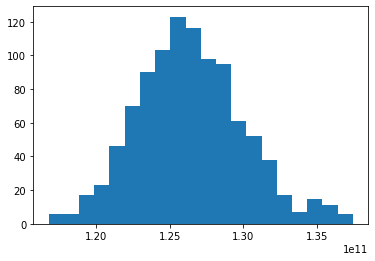

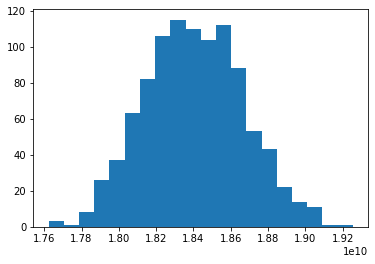

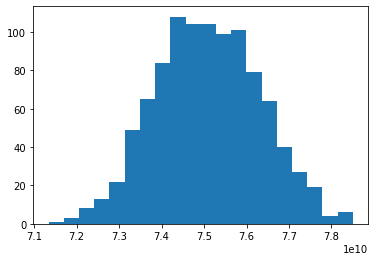

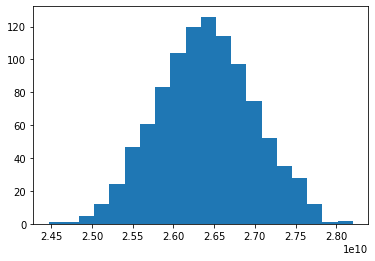

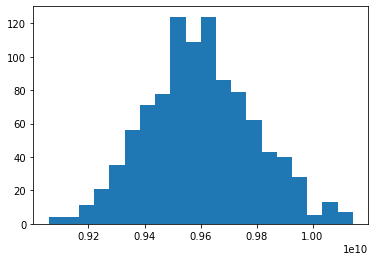

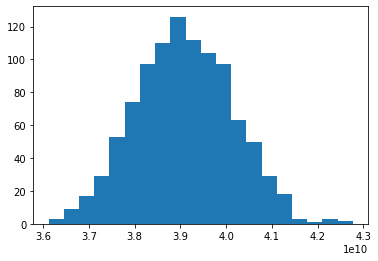

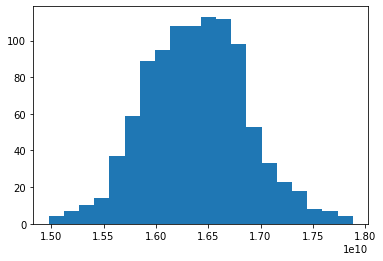

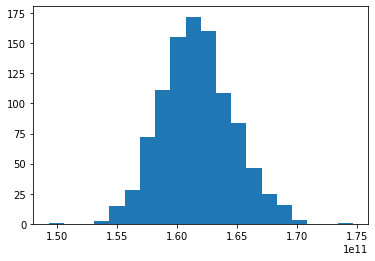

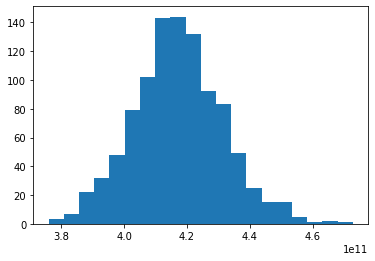

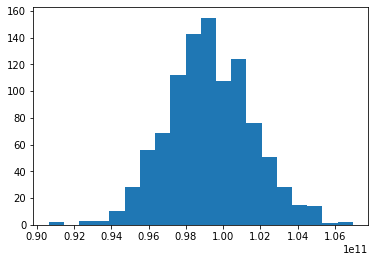

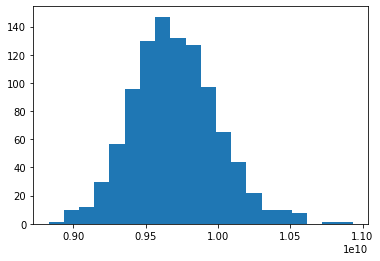

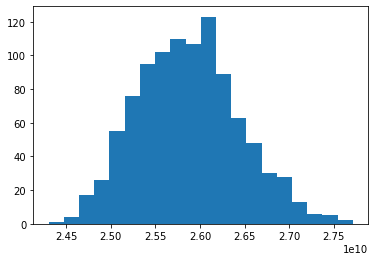

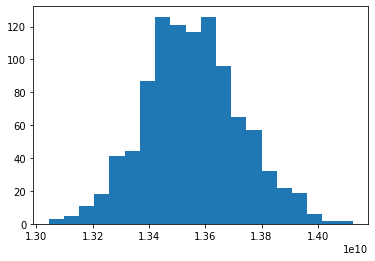

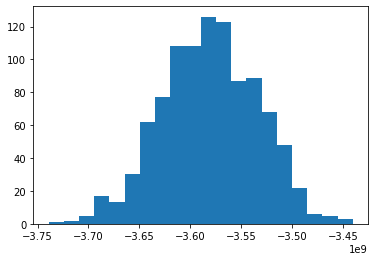

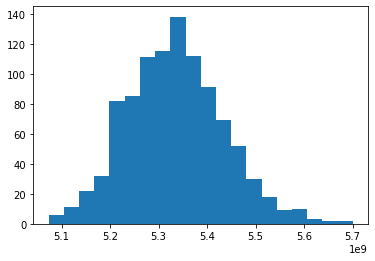

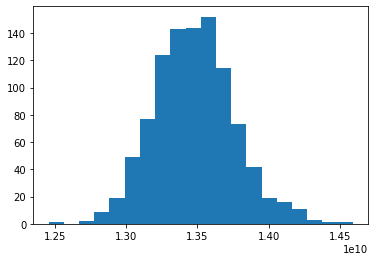

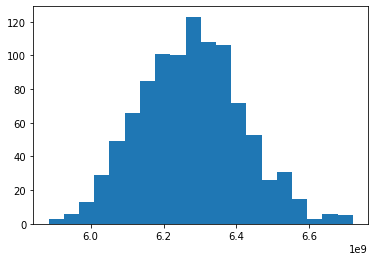

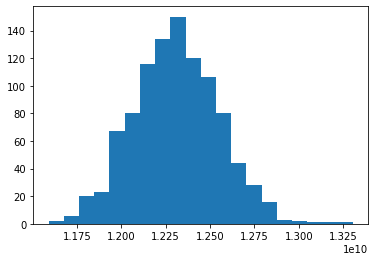

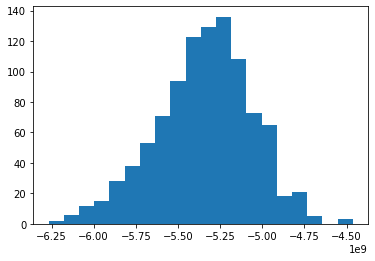

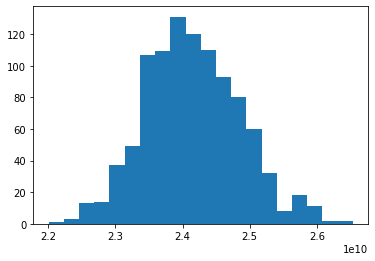

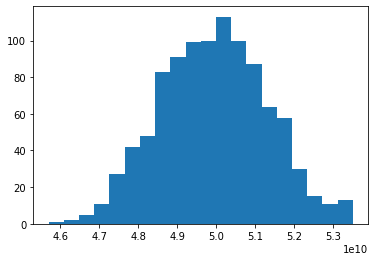

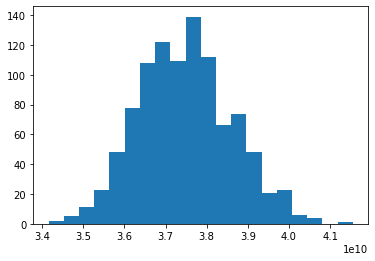

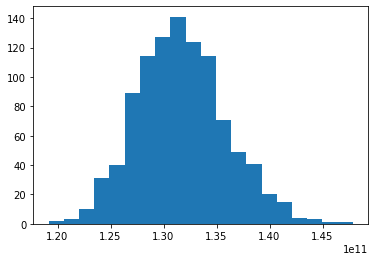

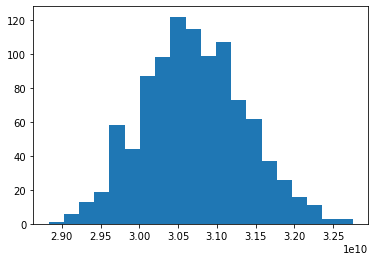

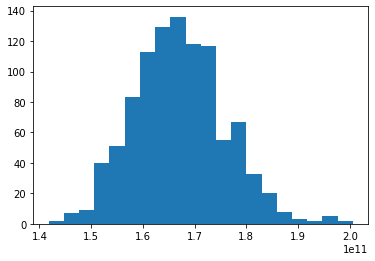

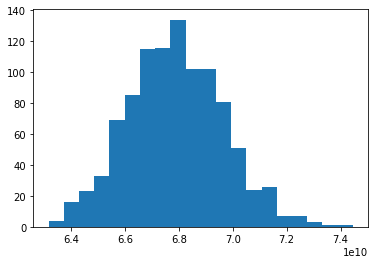

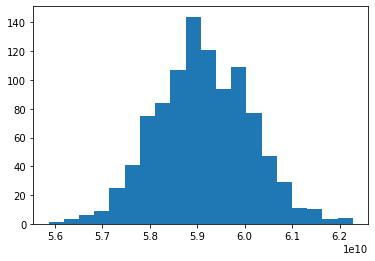

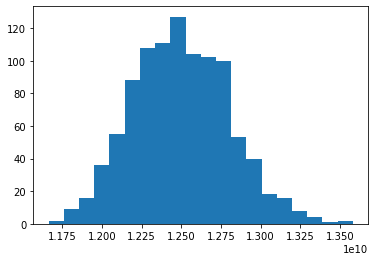

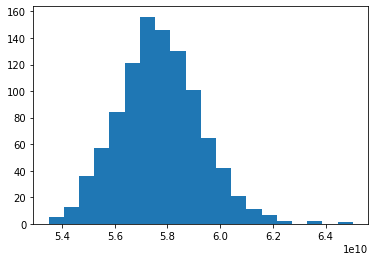

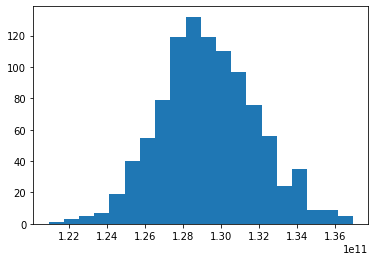

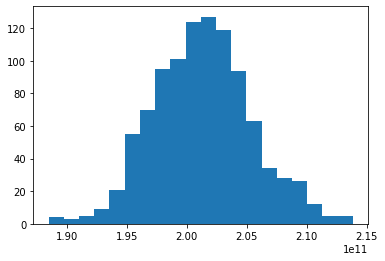

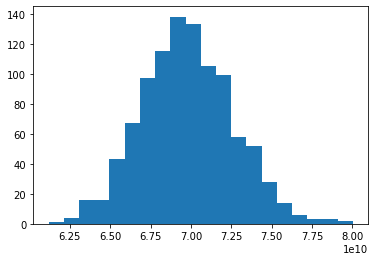

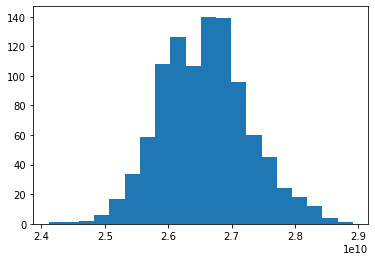

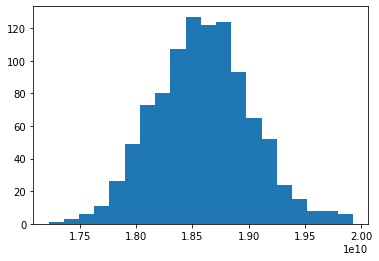

In [13]:
mode=[]

for i in output_distribution:
    
    mode.append(max(set(i), key=i.count))
    plt.hist(i, bins = 20)
    plt.show()

In [14]:
mode

[-25364613118.33081,
 17566982147.52028,
 29426233345.755325,
 38995179522.40537,
 23500214275.323013,
 91465545732.45853,
 24288909315.04731,
 5646159874.025145,
 22470111232.959824,
 10611730432.976974,
 26123882496.22632,
 33613930498.119358,
 2410305537.895372,
 17946834944.66191,
 13724157952.065336,
 65117292546.32747,
 80925243396.94344,
 20047249412.9765,
 -26611836921.69586,
 4366688260.322655,
 35371057153.687126,
 18822952961.378136,
 5664010241.886758,
 38997358595.795265,
 36417073152.19121,
 64090734592.312035,
 68075137024.53308,
 18463733761.307426,
 3701988724736.701,
 130581895168.9935,
 105323278337.21117,
 33557219328.728546,
 108856981506.44571,
 -36978114559.20175,
 24013303812.048485,
 4359739396.03767,
 29978302466.452614,
 12263297025.301577,
 13209694209.172901,
 19072839680.056015,
 38588440579.53807,
 12978141188.46849,
 -37698400254.040054,
 6799286273.20821,
 30535438336.905964,
 30794870784.62179,
 13373589504.911987,
 26554691586.91529,
 44341467138.1992